# Neural Networks on Fashion MNIST Dataset

## Objective
In this week's exercise, you will:
1. Utilize callback functions to monitor model's performance during training.
2. Experiment with different layer sizes to observe their effects on prediction accuracy and training speed.
3. Implement pixel value normalization to improve network training speed.
4. Construct a multilayer neural network to classify the Fashion MNIST image dataset.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist

2025-10-28 22:09:59.803459: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-28 22:10:01.307353: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 22:10:04.454578: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


---

## Step 2: Load and Preprocess the Data
We'll load the Fashion MNIST dataset and then normalize the pixel values.


In [2]:
# TODO Load the dataset using the fashion_mnist.load_data() function
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
X_train = train_images.reshape(-1,28*28)
X_test = test_images.reshape(-1,28*28)

# TODO Normalize the pixel values to be in range 0..1
x_train = X_train.astype("float32")/255.0
x_test = X_test.astype("float32")/255.0

# TODO Display Shapes
print(X_train.shape)
print(train_labels.shape)


(60000, 784)
(60000,)


---

## Step 3: Visualize the Data
Display some samples from the dataset.


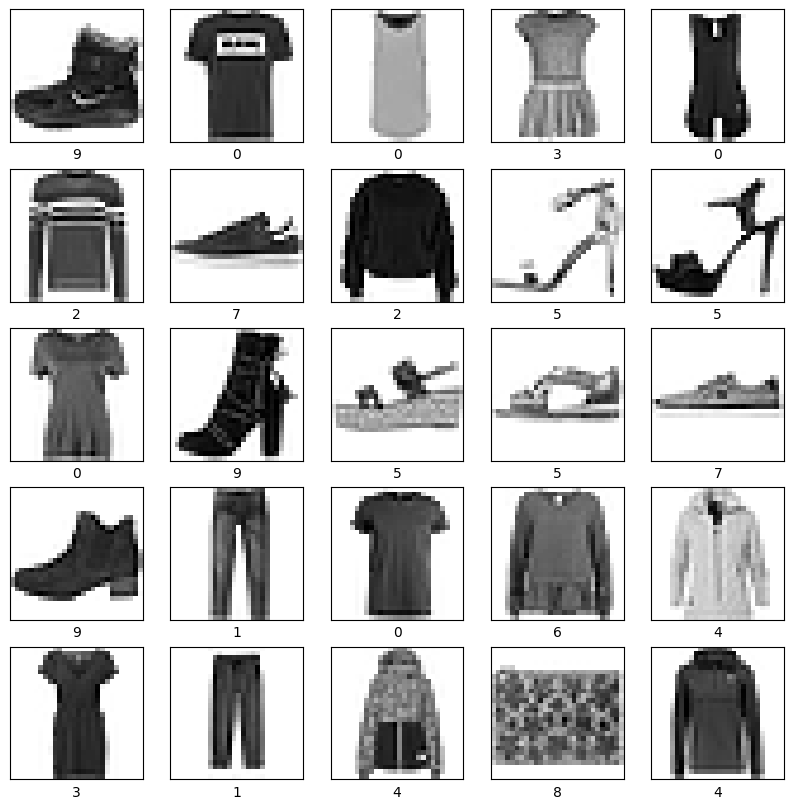

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

---

## Step 4: Define a Callback
Let's define a callback to monitor the model's accuracy during training.
If you're unsure how to do this, (re-)watch this [video](https://www.youtube.com/watch?v=WUzLJZCKNu4) on Callbacks in TensorFlow.

In [ ]:
# TODO define a callback that interrupts training after an accuracy of 90% is reached
    # def init(self, target=0.90, monitor='accuracy', min_epochs=3, patience=1, verbose=1):
    #     super().init()
    #     self.target = float(target)
    #     self.monitor = str(monitor)
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        monitor1 = 'val_accuracy'
        target1 = 0.90
        monitor2 = 'accuracy'
        target2 = 1.00
        value1 = logs.get(monitor1)
        value2 = logs.get(monitor2)        
        if value1 is not None and value1 >= target1:
            print(f"Reached {monitor1} {value1:.3f} >= {target1:.2f}. Stopping training.")
            self.model.stop_training = True
        if value2 is not None and value2 >= target2:
            print(f"Reached {monitor2} {value2:.3f} >= {target2:.2f}. Stopping training.")
            self.model.stop_training = True

accuracy_callback = AccuracyCallback()

def scheduler (epoch,lr):
    if epoch < 4:
        return lr
    else:
        return lr*0.99

lr_scheduler=keras.callbacks.LearningRateScheduler(scheduler,verbose=1)



---

## Step 5: Build a Neural Network
We will start with a simple neural network and then experiment with different layer sizes.


In [5]:
# TODO build an initial model (hint: you might need to flatten the input in the beginning)

## Building model with an including function
model = keras.Sequential(
    [
        keras.Input(shape=(28*28,)),  # Add comma to make it a proper tuple
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')  # Add softmax for classification
    ]
)

print(model.summary())

# import sys
# sys.exit()

# TODO compile your model, choose a suitable loss function and metric for measuring training performance
# Optional: research optimizers and try changing the optimizer to one other than the default setting

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    # optimizer=keras.optimizers.Adam(learning_rate=0.001),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

2025-10-28 22:10:08.263294: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


---

## Step 6: Train the Model
Train the model using the training data and your callback function.


In [ ]:
# TODO Train the model

model.fit(
    x_train,
    train_labels,
    epochs=460, # large cap; callback stops early
    batch_size=128,
    validation_split=0.1, # ensures val_accuracy is computed
    callbacks=[accuracy_callback, lr_scheduler],
    verbose=1
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7987 - loss: 0.5528 - val_accuracy: 0.8423 - val_loss: 0.4214 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8576 - loss: 0.3842 - val_accuracy: 0.8725 - val_loss: 0.3608 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8743 - loss: 0.3399 - val_accuracy: 0.8695 - val_loss: 0.3531 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/1000
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8856 - loss: 0.3102 - val_accuracy: 0.8810 - val_loss: 0.3200 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.00099

---

## Step 7: Evaluate the Model
Evaluate the model using the test data.


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8930 - loss: 0.7702
Test accuracy: 89.30%


---

## Step 8: Experiment with Layer Sizes
Modify the neural network architecture by changing the layer sizes, and note the effects on training speed and prediction accuracy. You are encouraged to experiment with various configurations.


## NOTES
- Definitely need a method for evaluating and comparing different adjustments
- ideally with a go back function once one has compared differnet approaches

### Learning Rate
- Increasing learning rate doesnt cut down compute time :/ 

### First hidden Layer
- Increase in layer size results in longer compute times.

### Layer Sweet Spot 
- Hidden Layers: '2' [512][256]

### Batch Size
- Increasing 'Batchsize' speeds up compute time!
- Higher batch size more accuracy gain in the beginning less later on?!